<a href="https://colab.research.google.com/github/Raghava2004-cpu/KNeighborsClassifier/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Pelvic incidence is a critical measurement in understanding spinal alignment and is often used in diagnosing and treating spinal deformities.

Pelvic tilt is the angle that indicates the orientation of the pelvis relative to the femur.

Lumbar lordosis refers to the natural inward curvature of the lumbar spine (lower back).

The sacral slope impacts spinal alignment and is a factor in determining the curvature of the spine

Spondylolisthesis refers to the forward displacement or slipping of a vertebra over the one below it.

In [52]:
data.shape

(310, 7)

In [53]:
data.drop_duplicates()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [54]:
data.isnull().sum()

,0
pelvic_incidence,0
pelvic_tilt numeric,0
lumbar_lordosis_angle,0
sacral_slope,0
pelvic_radius,0
degree_spondylolisthesis,0
class,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [56]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


<Axes: xlabel='class', ylabel='count'>

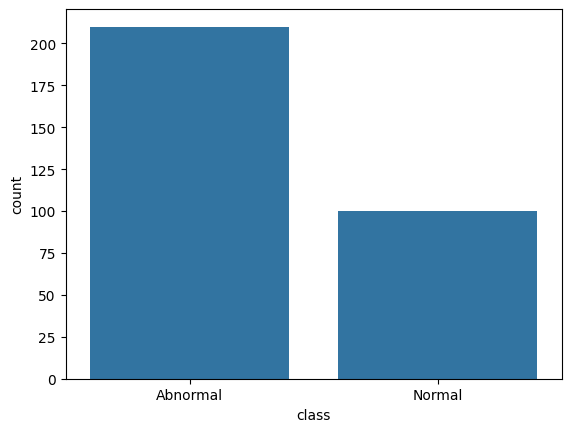

In [57]:
sns.countplot(x = 'class' , data = data)

In [58]:
data['class'].apply(lambda x : 1 if x== 'Normal' else 0)

,class
0,0
1,0
2,0
3,0
4,0
...,...
305,1
306,1
307,1
308,1


In [59]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]

In [60]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits = 10 , shuffle = True , random_state = 42)
best_k = 0
best_accuracy = 0
best_fold_data = None


for fold , (train_index , test_index) in enumerate(kf.split(x)):
   x_train , x_test = x.iloc[train_index] , x.iloc[test_index]
   y_train , y_test = y.iloc[train_index] , y.iloc[test_index]

   scaler = StandardScaler()
   x_train_scaled = scaler.fit_transform(x_train)
   x_test_scaled = scaler.transform(x_test)

   for k in range(1,100):
        new_model = KNeighborsClassifier(n_neighbors = k)
        new_model.fit(x_train_scaled , y_train)
        predict = new_model.predict(x_test_scaled)
        accuracy = accuracy_score(y_test , predict)

        if accuracy > best_accuracy:
           best_k = k
           best_accuracy = accuracy
           best_fold_data = (x_train , x_test , y_train , y_test)


if best_fold_data:
  (x_train , x_test , y_train , y_test) = best_fold_data
print(best_k)
print(best_accuracy*100)

83
93.54838709677419


In [61]:
print(x_train.shape)
print(best_k)

(279, 6)
83


FINDING THE BEST TRAINING AND TESTING DATA NOW WAS DONE USING THE CROSS VALIDATION WE FIT THE MODEL

In [62]:
model = KNeighborsClassifier(n_neighbors = 83)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model.fit(x_train_scaled , y_train)
predicted = model.predict(x_test_scaled)

Accuracy Score : 93.54838709677419


<Axes: >

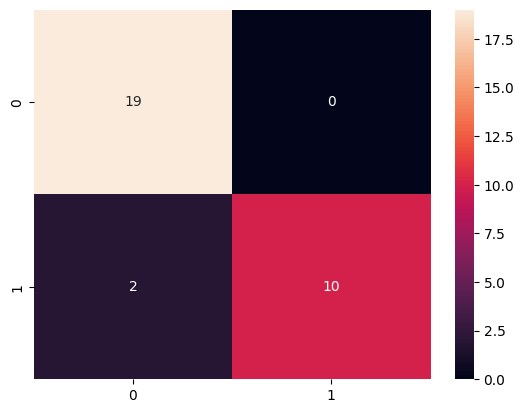

In [63]:
print(f"Accuracy Score : {accuracy_score(y_test , predicted)*100}")
cn = confusion_matrix(y_test , predicted)
sns.heatmap(cn  , annot = True)